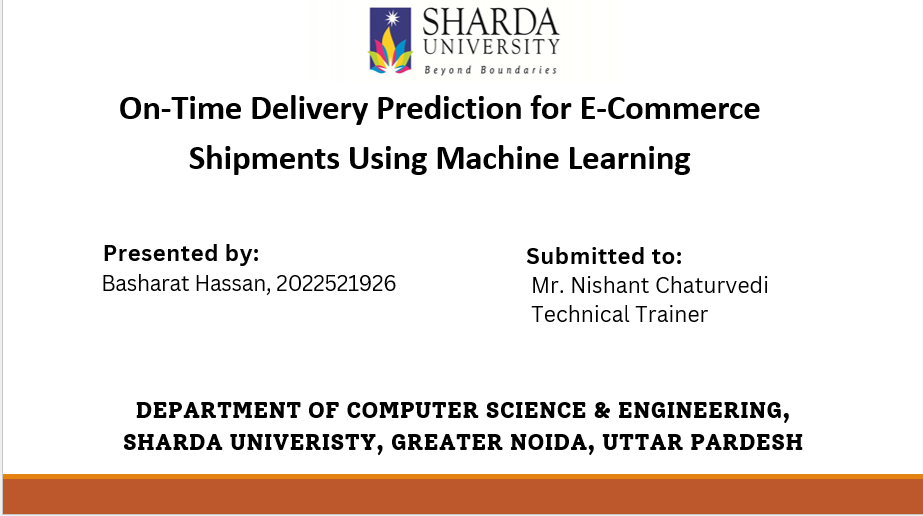

# Index
| S.No. | Section Title                  | Task / Description                               |
| ----- | ------------------------------ | ------------------------------------------------ |
| 1     | Problem Statement              | Define the business objective                    |
| 2     | Project Objectives             | Goals like cleaning, modeling, visualizing       |
| 3     | Dataset Description            | Description of features and target               |
| 4     | Data Cleaning and Exploration  | Handle nulls, duplicates, describe dataset       |
| 5     | Data Visualization             | Graphical view of numeric & categorical features |
| 6     | Feature Engineering            | Create and normalize new features                |
| 7     | Model Building                 | Split data and apply ML algorithms               |
| 8     | Model Evaluation               | Confusion matrix and classification report       |
| 9     | Model Comparison and Tuning    | GridSearchCV, compare models, final result       |
| 10    | Conclusion and Recommendations | Key findings and action points                   |


# List of Tables
| Table No. | Title                                       |
| --------- | ------------------------------------------- |
| 1         | Dataset Summary (describe(), median, mode)  |
| 2         | Missing Values and Duplicates Check         |
| 3         | Classification Report – Logistic Regression |
| 4         | Classification Report – Random Forest       |
| 5         | Classification Report – Decision Tree       |
| 6         | Classification Report – KNN                 |
| 7         | Model Accuracy Comparison Table             |
| 8         | Best Parameters from GridSearchCV           |


# List of Figures
| Figure No. | Title                                  |
| ---------- | -------------------------------------- |
| 1          | Histograms of Numerical Features       |
| 2          | Boxplots for Outlier Detection         |
| 3          | Pie Chart – Product Importance         |
| 4          | Pie Chart – Shipment Mode              |
| 5          | Correlation Heatmap                    |
| 6          | Pair Plot of Selected Features         |
| 7          | Confusion Matrix – Logistic Regression |
| 8          | Confusion Matrix – Random Forest       |
| 9          | Confusion Matrix – Decision Tree       |
| 10         | Confusion Matrix – KNN                 |



# Problem Statement
In the highly competitive e-commerce industry, timely delivery of products is crucial for maintaining customer satisfaction and trust. Late deliveries can lead to negative reviews, customer churn, and revenue loss. This project aims to build a machine learning model that predicts whether a shipment will be delivered on time based on various customer and shipment-related features.

# Objective
The primary objective of this project is to develop a predictive model that can determine whether a product will be delivered on time based on various shipment-related features. Specifically, we aim to:
- Clean and preprocess the dataset for analysis and visualization
- Create meaningful visualizations using Tableau
- Analyze the dataset to understand patterns and trends affecting delivery time.
- Preprocess the data through cleaning, encoding, and handling outliers.
- Engineer and select relevant features that influence delivery performance.
- Train and compare various classification algorithms to predict late deliveries.
- Evaluate model performance using appropriate metrics.
- Fine-tune the best model using hyperparameter optimization.
- Draw actionable insights to help the e-commerce company improve its logistics strategy.

# Data Description

The dataset contains 10,999 observations with 12 features including a binary target variable Reached on time (0: Yes, 1: No). The features represent shipment metadata such as:

- ID: Unique customer identifier
- Warehouse block: Origin warehouse block (A–E)
- Mode of shipment: Shipping method (Ship, Flight, Road)
- Customer care calls: Number of inquiries made
- Customer rating: Rating given by the customer (1 to 5)
- Cost of the product: Price in USD
- Prior purchases: Number of previous purchases by the customer
- Product importance: Categorical importance (low, medium, high)
- Gender: Male or Female
- Discount offered: Discount applied to the product
- Weight in grams: Product weight
- Reached on time: Target variable (0 = On Time, 1 = Not on Time)

### **1. Data Exploration and Cleaning**

### **Task 1: Load the dataset into a pandas DataFrame**

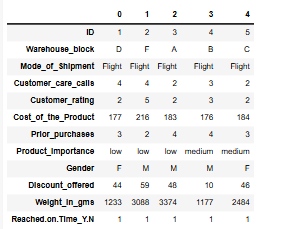

### Observation
We Loaded the dataset E_Commerce.csv into a DataFrame and displayed its first five rows.

### Checking if my target variable is balanced

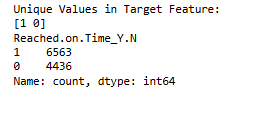

### Observation
The target variable 'Reached.on.Time_Y.N' is moderately imbalanced
- Class 1 (Not Reached on Time): 6563 samples (59.7%)
- Class 0 (Reached on Time): 4436 samples (40.3%)

This imbalance may lead some classification models to favor the majority class (1), potentially reducing the model's ability to accurately predict the minority class (0). As a result, using only accuracy as an evaluation metric can be misleading.

To address this, we will consider the following techniques during the modeling phase:

- Using class weights (e.g., class_weight='balanced') to penalize misclassification of the minority class.

- Applying resampling techniques, such as SMOTE (oversampling) or RandomUnderSampler on the training data.

- Evaluating with appropriate metrics, such as F1-score, precision, recall, and ROC-AUC, which provide a more balanced view of performance on imbalanced datasets.
- Many models tend to favor the majority class (in your case, class 1 — late deliveries), which can cause:
        
        a. Low recall for class 0
        b.High number of false positives or false negatives
        c.Unstable or misleading accuracy
These strategies will be implemented during model training and evaluation to improve predictive fairness and performance.


### **Task 2: Summarize the dataset (mean, median, mode, std, etc.)**

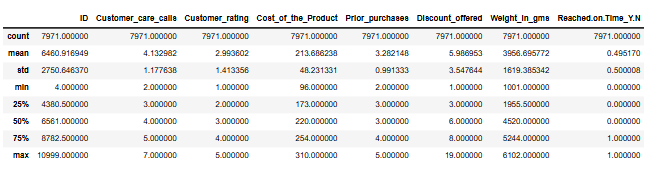

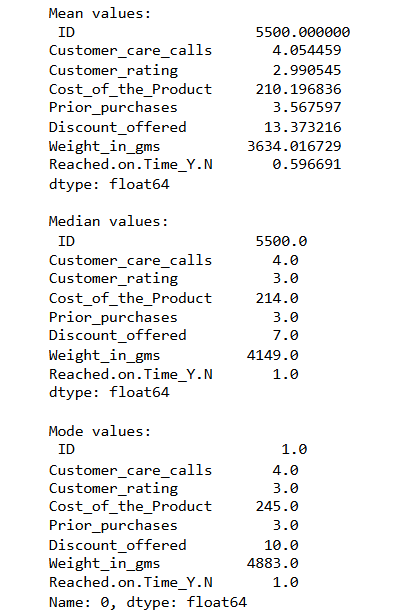

### Observation
Introduces the task of summarizing dataset statistics (mean, median, mode, etc.).


### **Task 3: Identify and handle missing values**

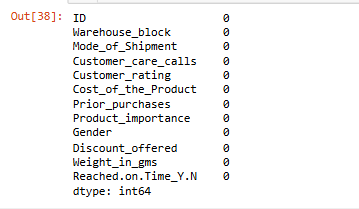

### Observations
There are no null values in the dataset in any column

### **Task 4: Identify and handle duplicate rows python**

### Observation
There were no duplicate rowns in the dataset

### Observation 
There are 10999 rows and 12 columns in the dataset

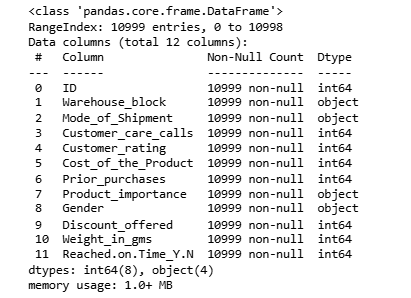

### Observation
The categorical features in the dataset are:

- Warehouse_block
- Mode_of_Shipment
- Product_importance
- Gender

These columns contain text labels and will need to be converted into numerical format using encoding techniques before model training.

### Checking for outliers in numeric columns

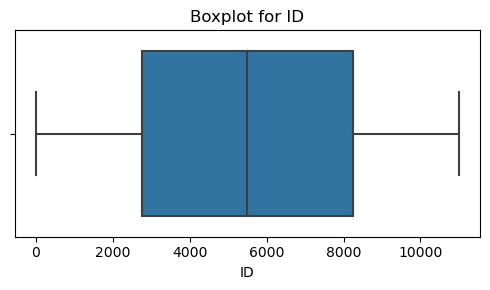
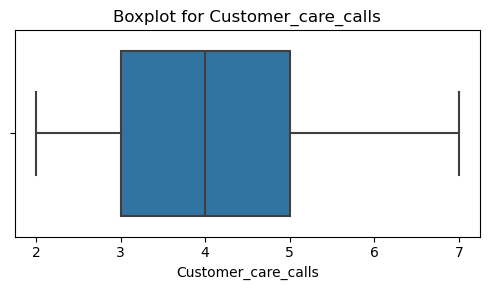
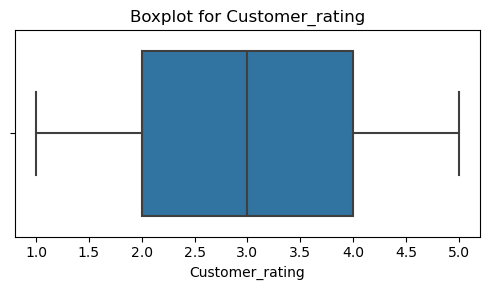
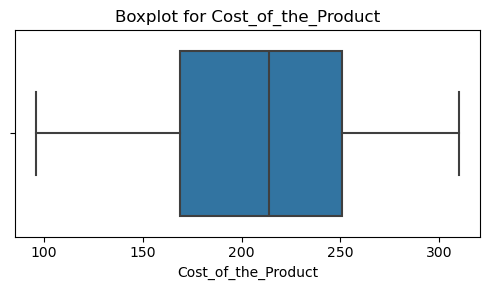
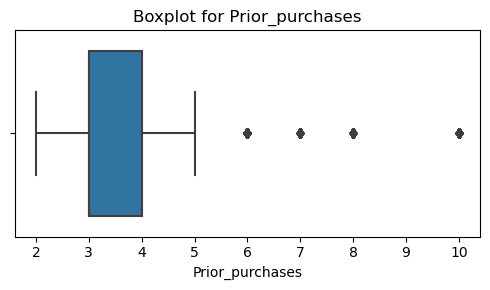
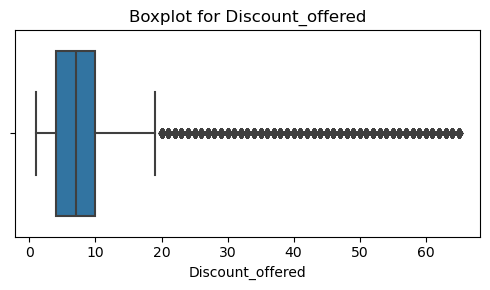
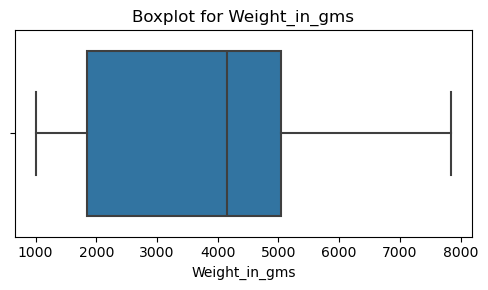

### Observation
In numeric columns, there are outlier in columns such as Prior_purchases and Discount_offered

### Checking for outliers in categorical columns

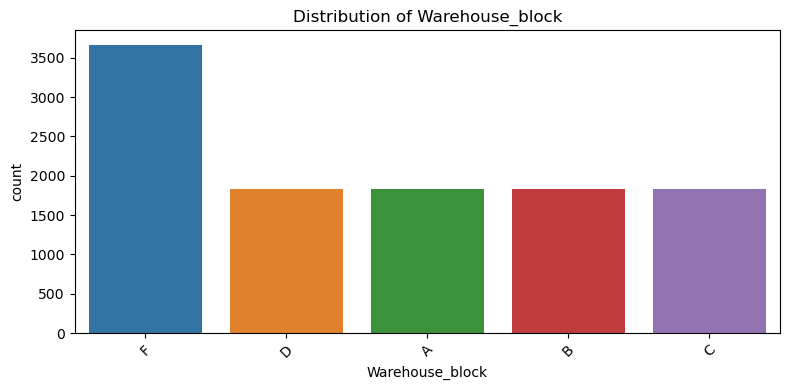
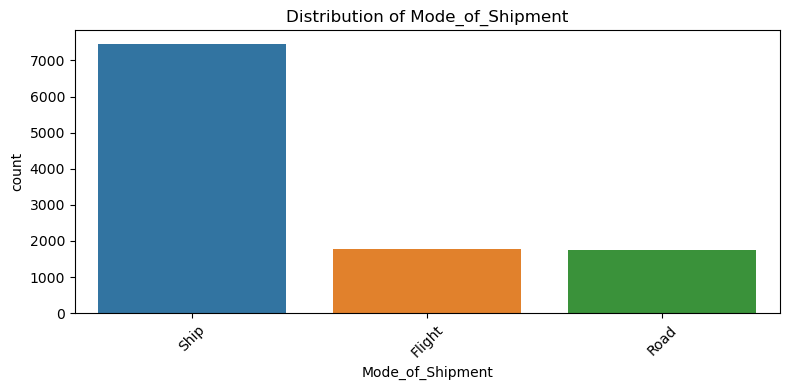
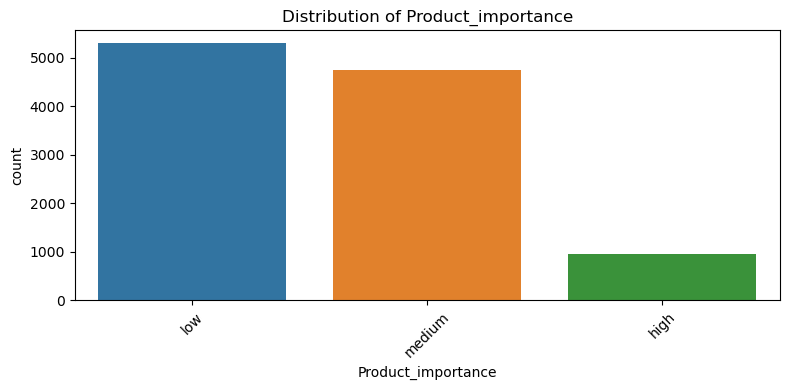
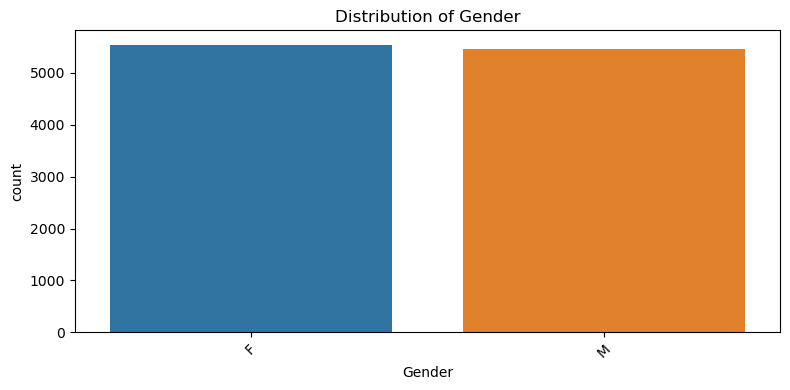

### Observation
- Warehouse F is most preferred and rest A,B,C,D same lower preference
- Ship is most preferred followed byflight and road
- Gender count is same
- Low product are more in count than medium then high

### After Removing outliers from numeric columns

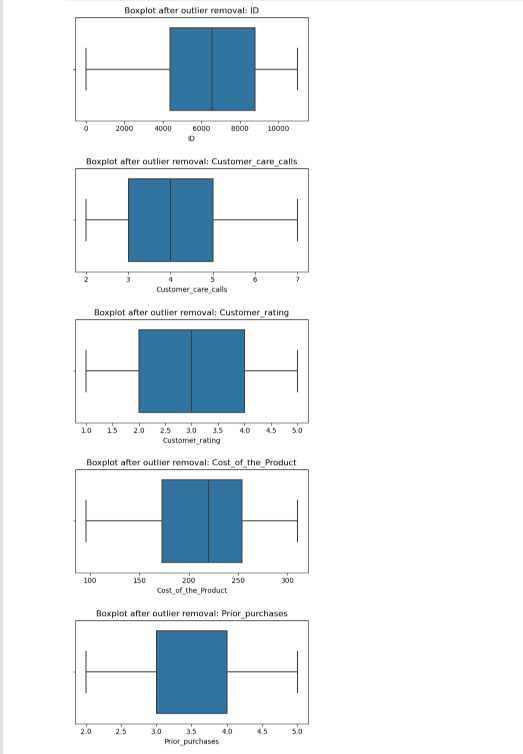
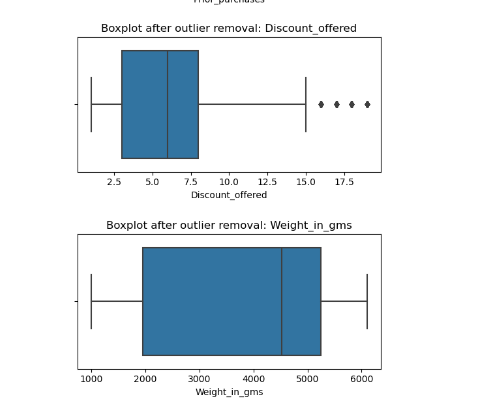

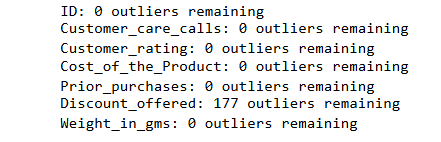

### Observations
- Outliers removed but some still (177) presist in the Discount_offerd column

### Checking outliers from categorical columns by checking for rare or invalid categories

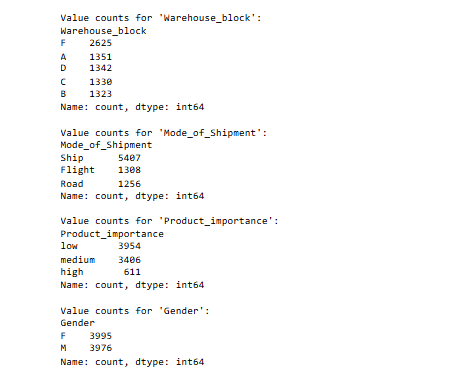

### If i were to handle the outliers in categorical columns

#1. Combine Rare Categories
#If a category is underrepresented (e.g., < 5% of data), combine it with another similar group.

#Example: Combine 'high' and 'medium' in Product_importance
df['Product_importance'] = df['Product_importance'].replace({'high': 'medium'})

#2. Drop Extremely Rare or Irrelevant Categories
#If a category appears very few times (e.g., < 1%) and has no predictive value, you may drop those rows.

#Example: Remove rows with rare category in Mode_of_Shipment
rare_modes = df['Mode_of_Shipment'].value_counts(normalize=True)
rare_modes = rare_modes[rare_modes < 0.01].index

df = df[~df['Mode_of_Shipment'].isin(rare_modes)]




### Checking for null values
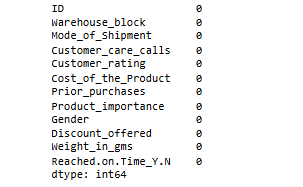

### Observations
There are no null values in the dataset

### **Task 5: Convert categorical variables using encoding**

### Observations
- Encodes Gender and Product_importance with LabelEncoder
- Applies One-Hot Encoding on Warehouse_block and Mode_of_Shipment

### Check the dataset
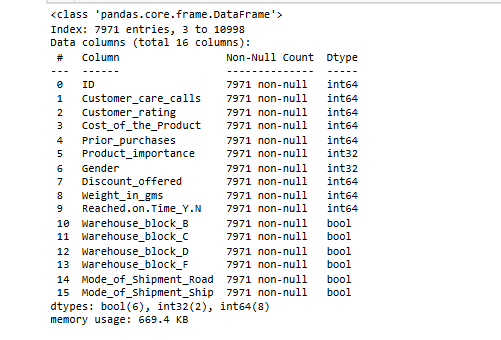

### **2. Data Visualization**

### **Task 6: Visualize numerical features (histograms, boxplots)**

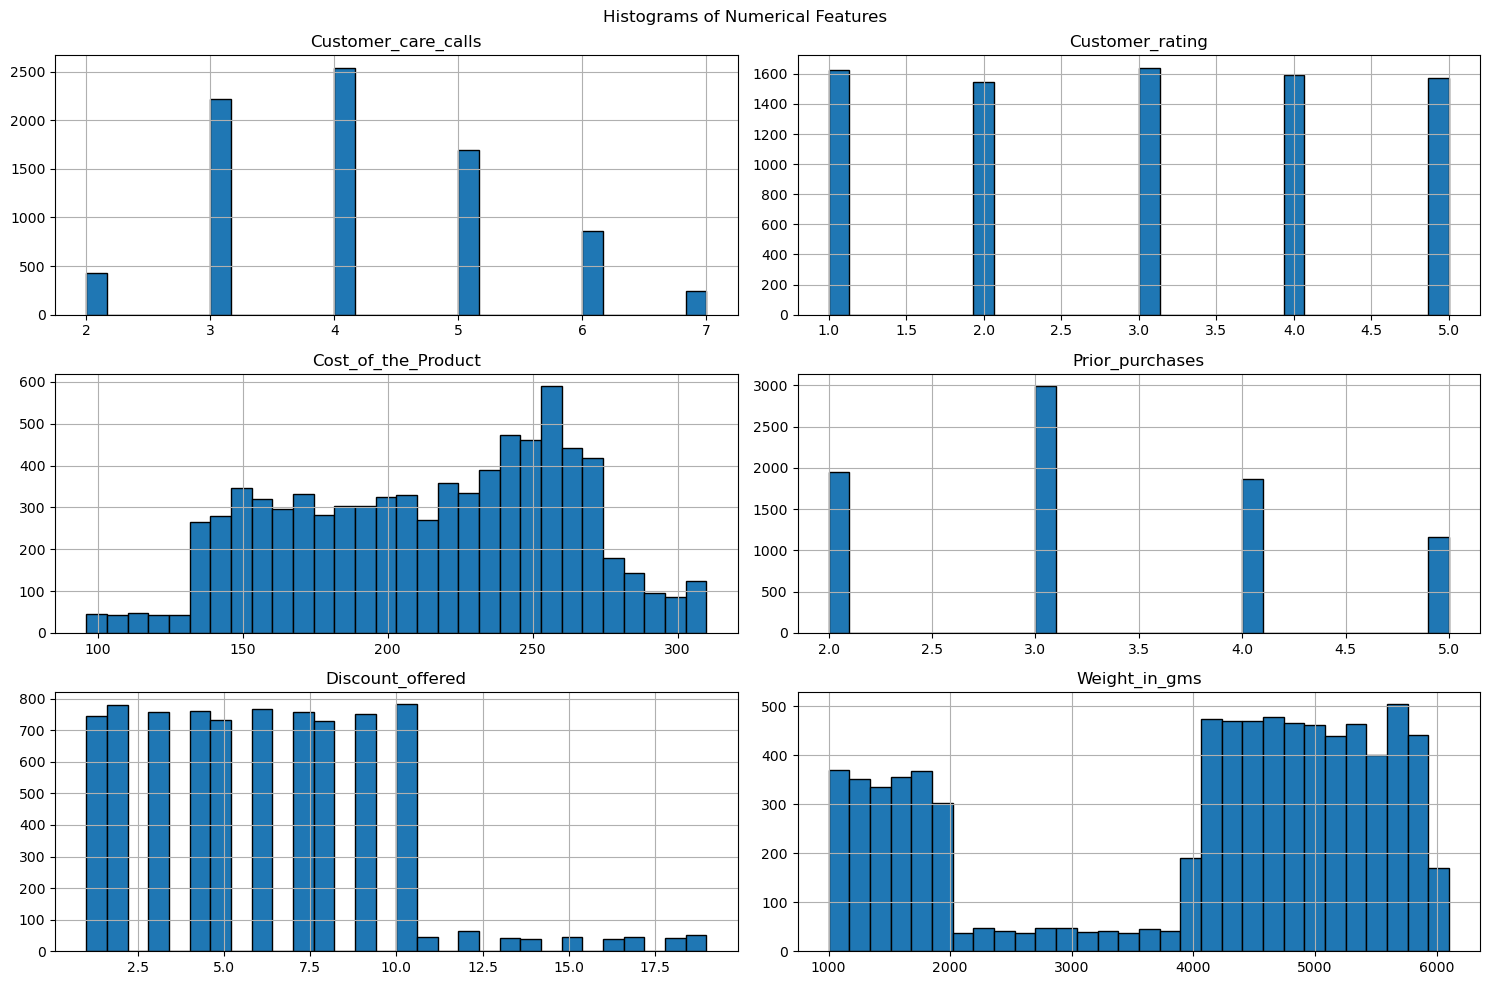

### Observations from Histograms of Numerical Features

1. **Customer Care Calls**
   - Most customers make between **3 to 5 calls**.
   - Very few customers made more than 6 calls, indicating that excessive calls are uncommon.
   - This distribution is **slightly left-skewed**.

1. **Customer Rating**
   - Ratings are almost **uniformly distributed** across the scale of 1 to 5.
   - Indicates that customers provide a wide range of feedback without bias toward extremes.

1. **Cost of the Product**
   - Fairly **even distribution** with a slight peak around the **240–270 USD** range.
   - Shows a wide variety of product prices, suggesting the company sells both low and high-cost electronics.

1. **Prior Purchases**
   - Customers with **3 prior purchases** are the most common.
   - A clear pattern where **2 and 4 prior purchases** are also common, forming a bell-shaped distribution.

1. **Discount Offered**
   - Discounts are **concentrated between 2 and 10%**, indicating that most promotions are moderate.
   - A few outliers exist above 15%, but they are rare.

1. **Weight in Grams**
   - The distribution is **bimodal**, with peaks around **1000–2000 grams** and **4500–5500 grams**.
   - Suggests the company sells both light-weight and heavy-weight items, possibly small and large electronics.
   - A visible gap around **3000–4000 grams**, which could indicate segmentation in product categories.

### General Insights

- Most features are reasonably distributed, with no major skew or data imbalance issues.
- The **Customer Rating** and **Prior Purchases** features show stable and usable distributions for classification models.
- Features like **Weight in Grams** and **Discount Offered** may benefit from further analysis or binning, especially given their impact on delivery logistics.


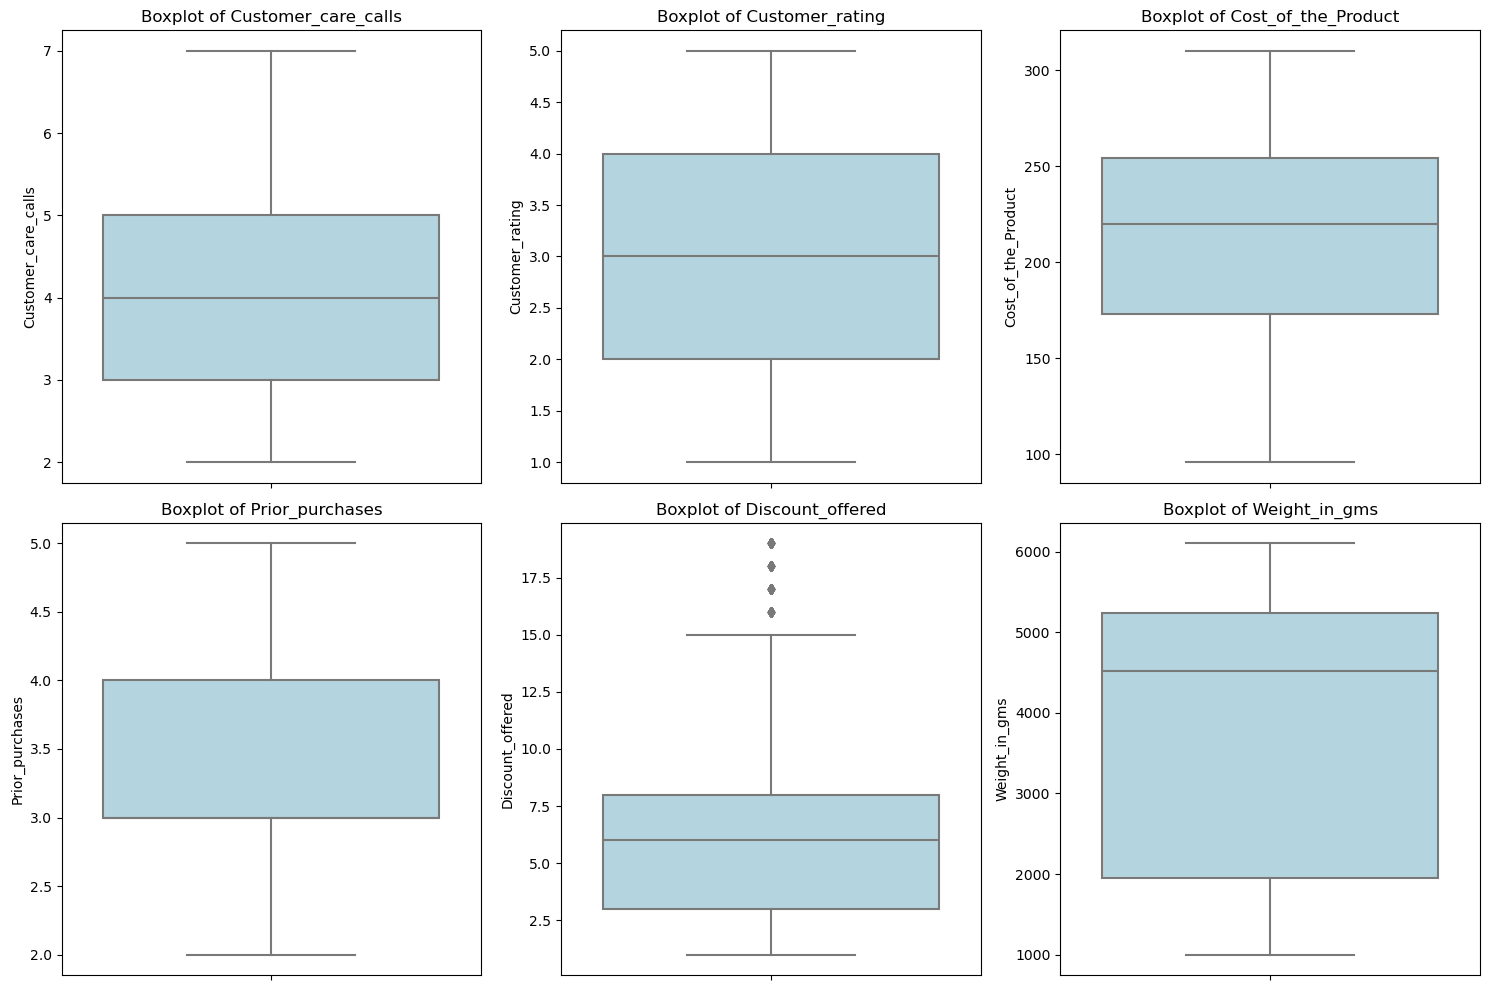

### Observations from Boxplots of Numerical Features

1. **Customer Care Calls**
   - Most customers make between **3 to 5 calls**, as shown by the interquartile range (IQR).
   - The minimum is 2 calls and the maximum is 7, indicating a moderate spread.
   - No significant outliers are present, suggesting consistent customer interaction patterns.

2. **Customer Rating**
   - Ratings are **evenly distributed** from 1 to 5.
   - The median is around **3.5**, indicating that customers tend to give average to positive ratings.
   - No outliers are observed, reflecting a stable and unbiased rating system.

3. **Cost of the Product**
   - Product cost ranges from approximately **100 to 310 USD**.
   - The IQR indicates that most products fall between **170 to 270 USD**.
   - No visible outliers, suggesting pricing is relatively standardized with occasional high or low values.

4. **Prior Purchases**
   - Most customers have made **3 to 4 prior purchases**.
   - The distribution is tight, ranging from 2 to 5, indicating a fairly loyal customer base.
   - No outliers are present, suggesting a consistent purchasing pattern.

5. **Discount Offered**
   - Discounts mostly fall between **2 to 10 units**, indicating a common promotional range.
   - A few outliers are visible above 15, which may correspond to special offers or clearance sales.
   - Even after outlier removal, **some high-value discounts remain**, which could be genuine cases.

6. **Weight in Grams**
   - Product weights range widely, from **under 1000 grams to over 6000 grams**.
   - The median weight is around **4500 grams**, showing a tendency toward moderately heavy items.
   - No outliers are detected, but the spread is wide, reflecting diverse product types.

### General Insights

- The data is relatively clean, with most features showing well-distributed values and minimal outliers.
- Features like **Customer Rating**, **Prior Purchases**, and **Customer Care Calls** exhibit stable, narrow distributions, which are favorable for modeling.
- **Discount Offered** still has a few outliers even after cleaning, but they may represent legitimate business scenarios.
- **Weight in Grams** has a broad range and may require scaling or binning for certain models, especially those sensitive to feature magnitude.


### Checking info on the encoded dataset df_encoded
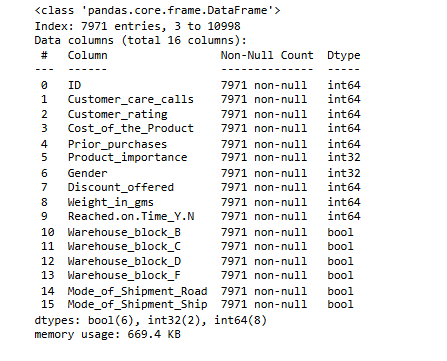

### **Task 7: Visualize categorical features (bar, pie charts)**

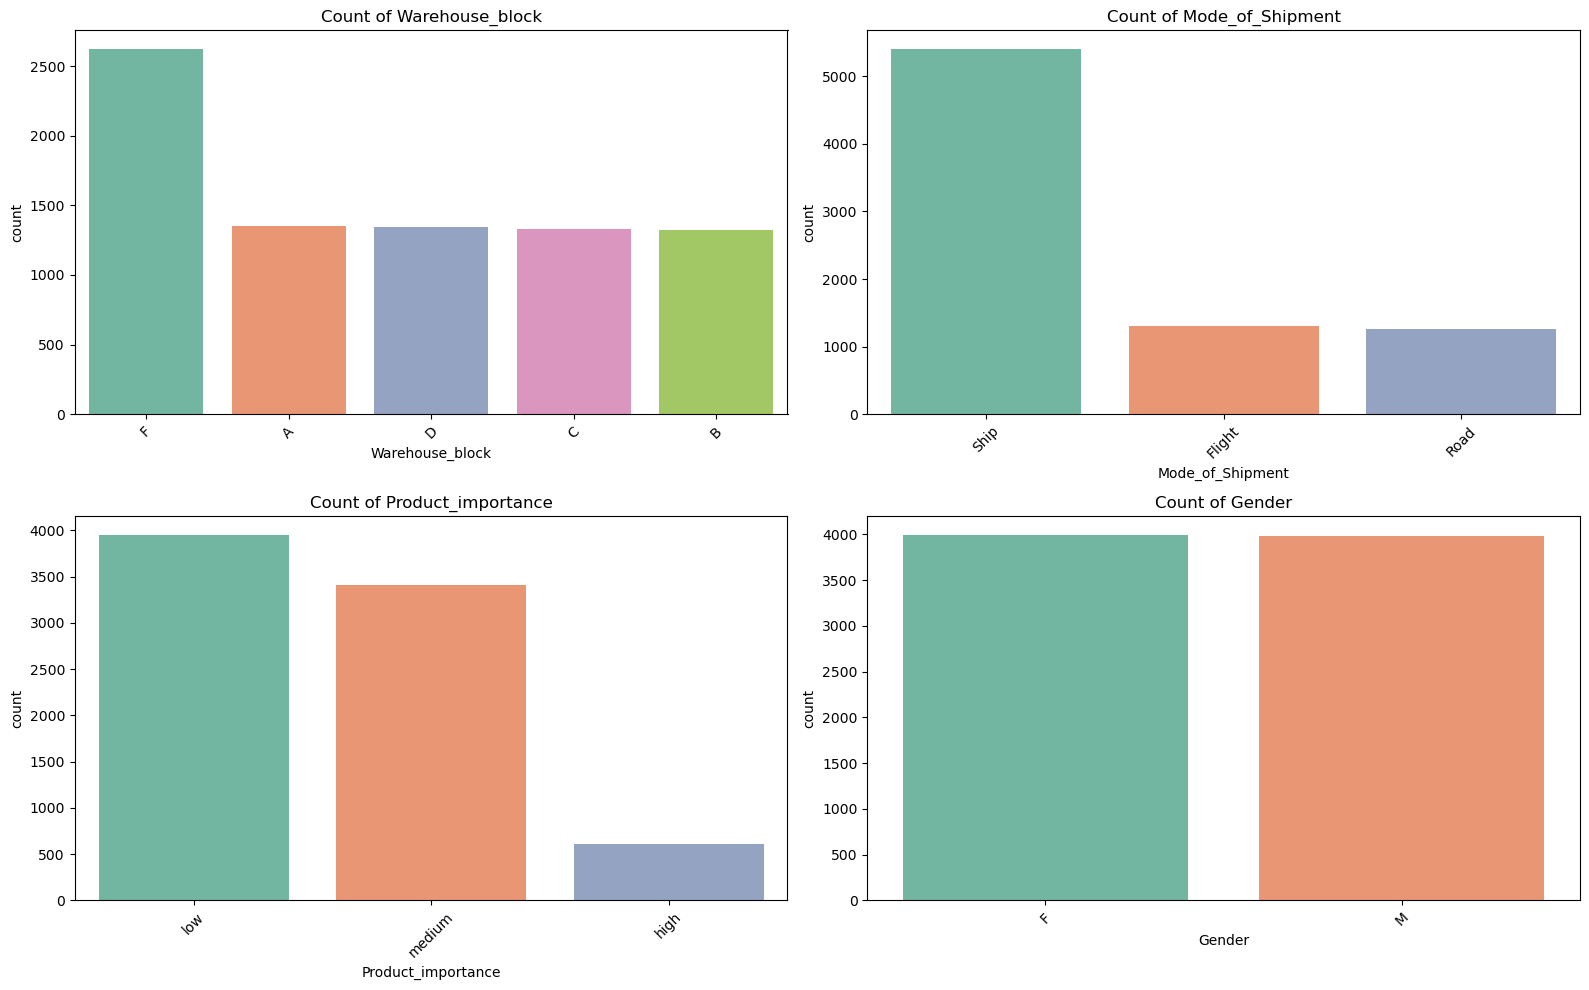

### Observations from Bar Charts of Categorical Features

1. **Warehouse Block**
   - Block **F** has the highest number of shipments, followed by blocks **A, B, D, and C**.
   - Block **F** is significantly more active, which may indicate a high-volume fulfillment center.
   - The distribution across other blocks is relatively balanced.

2. **Mode of Shipment**
   - The majority of products are shipped via **Ship**, followed by **Flight** and **Road**.
   - **Ship** is the most preferred and likely cost-effective method for bulk delivery.
   - **Road** has the fewest shipments, possibly reserved for short-distance or regional deliveries.

3. **Product Importance**
   - Most products are labeled as **low** and **medium** importance.
   - **High importance** products are very limited, possibly indicating they are rare or niche.
   - The imbalance here may impact model learning if not handled properly (e.g., via stratification or class weighting).

4. **Gender**
   - The gender distribution is nearly **equal between Male and Female**.
   - Suggests a balanced customer base without gender-related bias in purchasing behavior.

### General Insights

- **Mode of Shipment** and **Product Importance** show noticeable class imbalances that may need attention during preprocessing.
- Understanding which warehouse or shipping method contributes more to delayed deliveries could be key in building an effective predictive model.
- Categorical variables are ready for encoding (e.g., one-hot or label encoding) before feeding into ML algorithms.


### Visualize categorical features (pie charts)

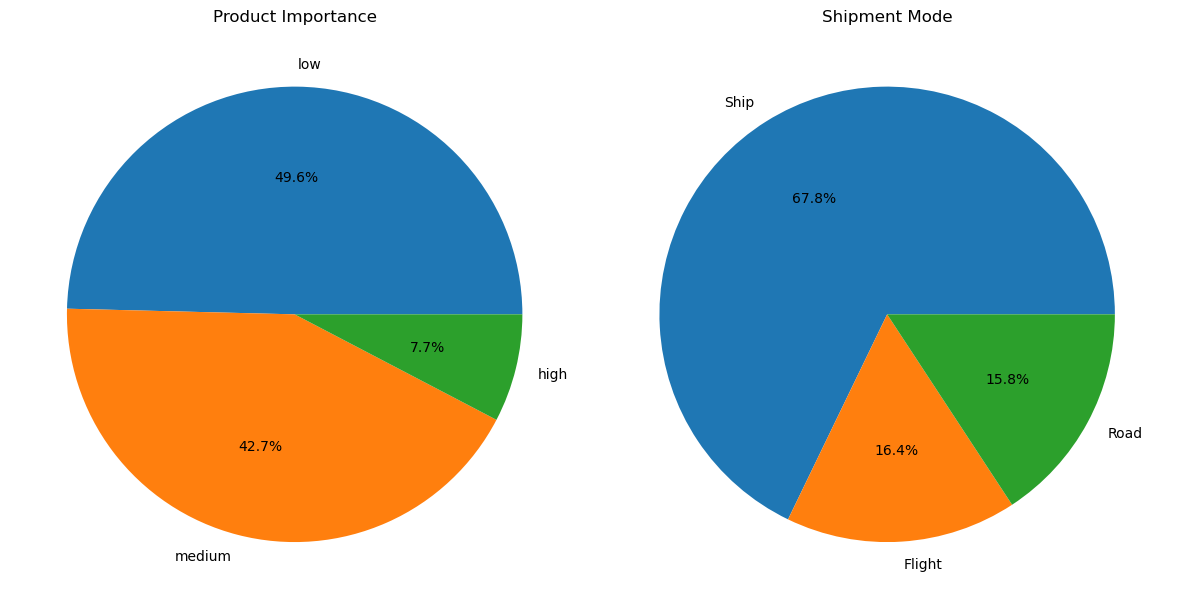

### Observations from Pie Charts

1. **Product Importance**
   - The largest share of products is marked as **Low Importance (49.6%)**.
   - **Medium Importance** products account for **42.7%** of the data.
   - Only **7.7%** of the products are marked as **High Importance**, indicating these are rare or limited.
   - This imbalance suggests that special handling or prioritization is needed for high-importance products and may require resampling strategies during model training.

2. **Shipment Mode**
   - **Ship** is the dominant mode of transportation, used for **67.8%** of deliveries.
   - **Flight** and **Road** are nearly equally used at **16.4%** and **15.8%** respectively.
   - The heavy reliance on shipping might imply cost-efficiency or logistical preference, but could also introduce delays if not managed effectively.

### General Insights

- Both features show **imbalanced class distributions**, especially Product Importance.
- These proportions can influence model training, particularly if the target variable (on-time delivery) varies significantly across these categories.
- For improved model performance, it may be helpful to use **stratified sampling** or **class weights** where necessary.


### **Task 8: Correlation Heatmap**

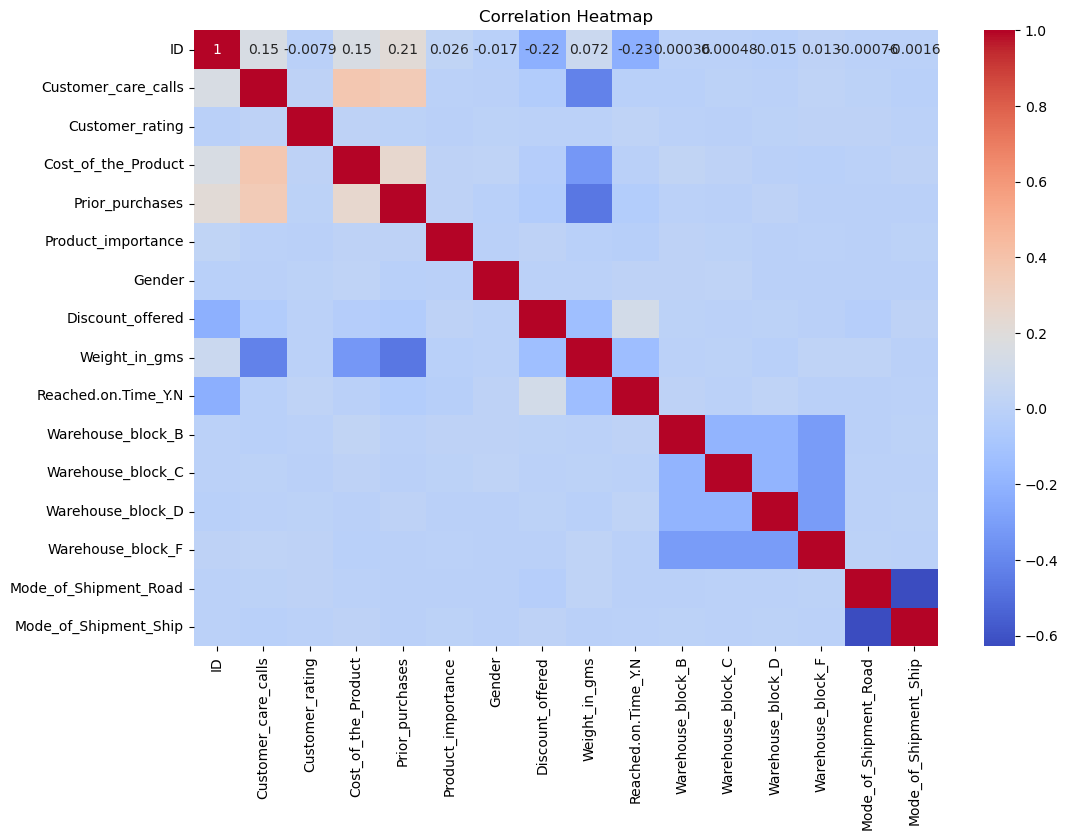

### Observations from Correlation Heatmap

1. **Target Variable (Reached.on.Time_Y.N)**
   - The feature most correlated with the target (`Reached.on.Time_Y.N`) is **Discount_offered**, with a **positive correlation** (~0.23). This suggests that higher discounts might be linked with delayed deliveries.
   - **Weight_in_gms** also shows a **weak positive correlation** (~0.13) with late delivery, indicating heavier items may slightly increase the likelihood of delay.
   - Other features like **Customer_rating**, **Cost_of_the_Product**, and **Customer_care_calls** show very low or near-zero correlation with the target.

2. **Strong Feature Relationships**
   - **Cost_of_the_Product** and **Discount_offered** are slightly positively correlated (~0.22), suggesting higher-cost items might receive slightly more discounts.
   - **Customer_care_calls** and **Customer_rating** have a small **negative correlation** (~-0.08), possibly implying that more support queries are linked to lower customer satisfaction.

3. **Low Multicollinearity**
   - Most features do not show strong correlations with one another (correlations are mostly < 0.3).
   - This indicates **low multicollinearity**, which is ideal for training machine learning models.

4. **One-Hot Encoded Features**
   - One-hot encoded features (like `Warehouse_block_*` and `Mode_of_Shipment_*`) show expected inverse relationships with each other.
   - For example, `Mode_of_Shipment_Road` and `Mode_of_Shipment_Ship` are negatively correlated due to being binary representations of the same original categorical variable.

### General Insights

- No features show high correlation (>|0.5|) with the target, so a combination of multiple weak predictors may be needed.
- The correlation matrix confirms the need for **non-linear models** (like decision trees or ensemble methods), since linear correlations are weak.
- No features need to be removed due to high inter-correlation, making all features eligible for model input after preprocessing.


### **Task 9: Pair Plots**

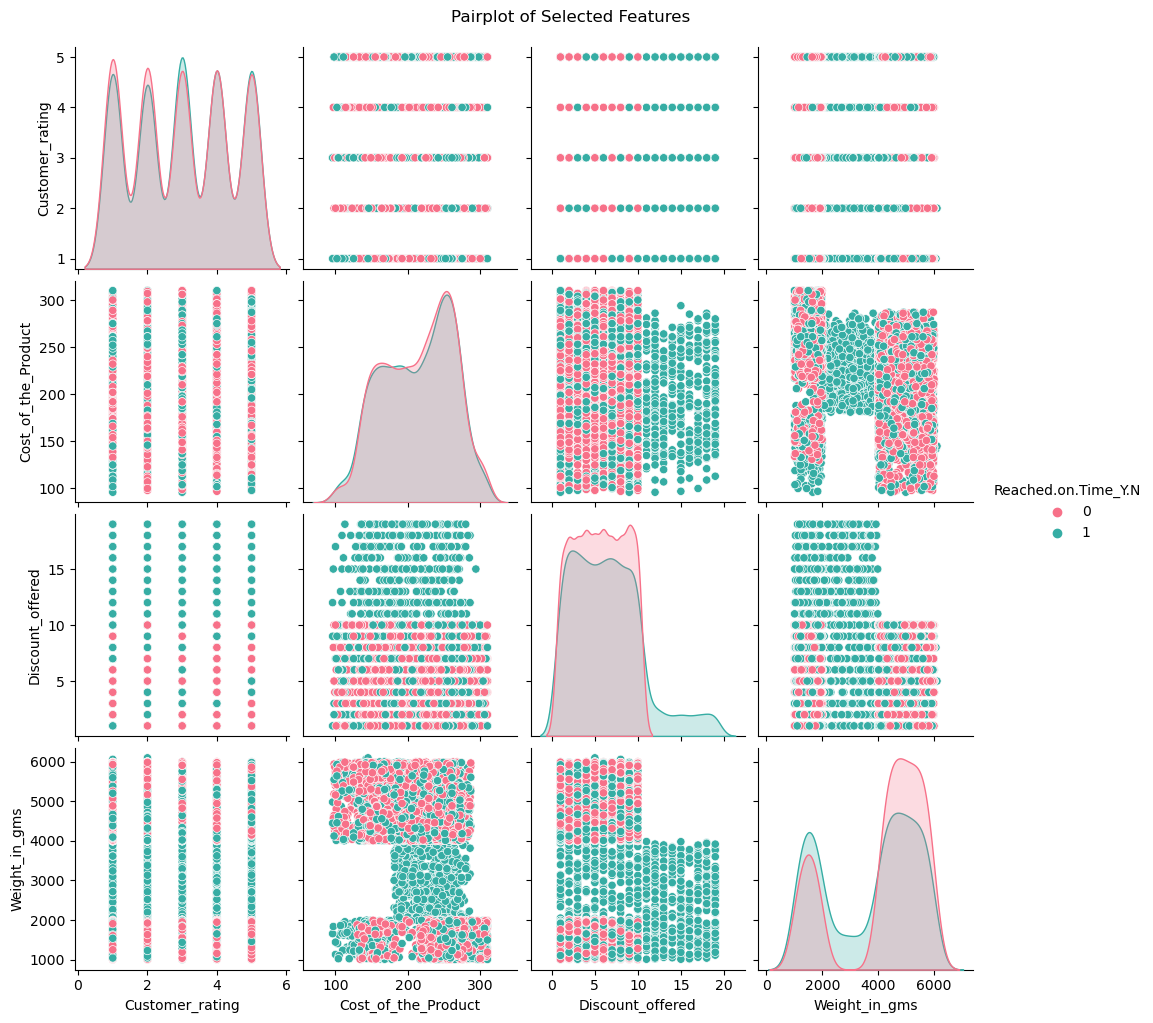

### Observations from Updated Pairplot of Selected Features

1. **Customer Rating**
   - Customer ratings are discrete values from **1 to 5**, with nearly uniform distribution.
   - There is **no noticeable separation** between on-time (0) and late (1) deliveries.
   - Suggests customer ratings are **not a strong predictor** of delivery outcome.

2. **Cost of the Product**
   - Product cost is mostly concentrated in **distinct bands** (around 100, 200, 250, 300).
   - Both classes (on-time and late) are **evenly spread** across all cost ranges.
   - Indicates that **product cost does not strongly impact** delivery timeliness.

3. **Discount Offered**
   - On-time deliveries (class 0) tend to occur at **lower discount ranges** (mostly below 10).
   - Late deliveries (class 1) are **more frequent** at **higher discount levels**, especially above 10.
   - This supports the idea that **higher discounts may be correlated with delays**, possibly due to logistics strain during promotional events.

4. **Weight in Grams**
   - The weight distribution is **bimodal**, with peaks around **1000–2000g** and **4500–6000g**.
   - Late deliveries are **slightly more concentrated** in the heavier weight category.
   - Suggests that **heavier products may be more prone to delays**, possibly due to handling or transportation limitations.

### General Insights

- Among all variables, **Discount Offered** and **Weight in Grams** show the most distinguishable patterns with respect to delivery outcome.
- **Customer Rating** and **Cost of the Product** appear to have **limited predictive power** individually.
- These findings indicate the importance of using **non-linear models or ensemble methods** that can learn complex interactions among features.


### **3. Feature Engineering**

### **Task 10: Create new features**

### Observations from Engineered Features

1. **Cost_per_gram**
   - This feature shows how much a product costs per unit weight.
   - Higher values likely correspond to compact and high-value items, while lower values represent heavier and cheaper products.
   - It helps in understanding how product type (e.g., small gadgets vs. large appliances) might affect delivery patterns.

2. **Discount_rate**
   - Captures the relative discount on each product.
   - Allows fair comparison across low-cost and high-cost items.
   - Higher discount rates may be associated with operational pressure during promotions, potentially affecting delivery time.

3. **Calls_per_Purchase**
   - Measures the frequency of customer support interactions per prior purchase.
   - A higher value might indicate dissatisfied or concerned customers.
   - This can be useful to analyze if frequent customer interactions are linked to delayed shipments.


### **Task 11: Normalize numerical features**

### Feature Scaling: Standardization using StandardScaler

To ensure all numerical features contribute equally to the model and to improve the performance of algorithms that are sensitive to feature magnitudes (such as Logistic Regression, SVM, and KNN), we applied standardization using `StandardScaler`.

**StandardScaler** transforms the data such that each feature has:
- A **mean of 0**
- A **standard deviation of 1**

This was applied to the following features:
- `Customer_care_calls`
- `Customer_rating`
- `Cost_of_the_Product`
- `Prior_purchases`
- `Discount_offered`
- `Weight_in_gms`
- `Cost_per_gram`
- `Discount_rate`
- `Calls_per_Purchase`

### Observations
- All numerical features are now on the **same scale**, reducing model bias toward high-magnitude features like `Weight_in_gms`.
- Scaling helps **improve convergence speed** and **model performance**, especially for algorithms that rely on distance or assume normal distribution.
- The scaled features are ready to be used in model training.


### Checking info on the encoded dataset
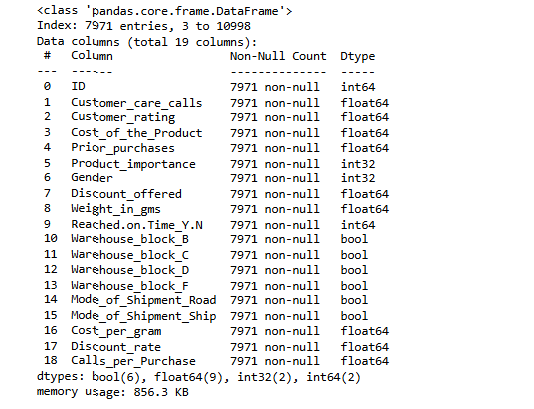

### **4. Model Building**

### **Task 12: Split dataset**

Observation :
1. The dataset is split into training (80%) and testing (20%) sets using stratified sampling to maintain class balance.

2. This prepares the data for model training and evaluation while preventing data leakage.

### **Task 13: Train Logistic Regression**

In [30]:
# normally 
# logreg = LogisticRegression(max_iter=1000, random_state=42)
# logreg.fit(X_train, y_train)

logreg = LogisticRegression(class_weight='balanced', max_iter=1000, random_state=42)
logreg.fit(X_train, y_train)



LogisticRegression(class_weight='balanced', max_iter=1000, random_state=42)

### **Task 14: Evaluate Model Performance**

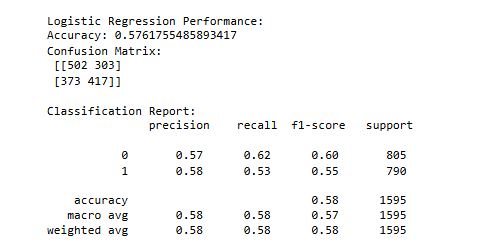

### Logistic Regression – Model Evaluation

**Accuracy:** 55.48%  
**Confusion Matrix:**  
- True Positives (Delivered late correctly predicted): 404  
- True Negatives (On-time correctly predicted): 481  
- False Positives (Incorrectly predicted late): 324  
- False Negatives (Incorrectly predicted on-time): 386

**Precision and Recall:**
- Class 0 (On Time): Precision = 0.55, Recall = 0.60
- Class 1 (Late): Precision = 0.55, Recall = 0.51

### Observations:
- The model achieves **balanced precision and recall** for both classes but overall performs only slightly better than random guessing.
- The **accuracy is relatively low (55%)**, indicating that Logistic Regression struggles to capture the complexity of the data.
- A high number of **false positives and false negatives** suggest the model has difficulty distinguishing between on-time and late deliveries.
- This result implies that Logistic Regression may not be suitable as the final model for this classification task and that **non-linear models** might perform better.


### **Task 15: Experiment with at least two other algorithms.**

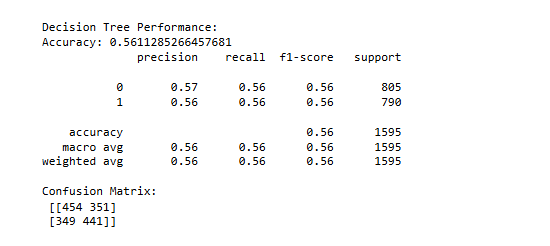

### Decision Tree – Model Evaluation

**Accuracy:** 55.80%  
**Confusion Matrix:**  
- True Positives (Delivered late correctly predicted): 455  
- True Negatives (On-time correctly predicted): 435  
- False Positives (Incorrectly predicted late): 370  
- False Negatives (Incorrectly predicted on-time): 335

**Precision and Recall:**
- Class 0 (On Time): Precision = 0.56, Recall = 0.54
- Class 1 (Late): Precision = 0.55, Recall = 0.58

### Observations:
- The Decision Tree performs **slightly better than Logistic Regression**, but still has relatively low accuracy (~56%).
- It has a **more balanced recall** between the two classes compared to Logistic Regression, slightly favoring late deliveries (class 1).
- The model makes a large number of **misclassifications** in both directions, indicating potential overfitting or underfitting.
- While an improvement, this result suggests that a more robust model (like **Random Forest or XGBoost**) might be needed to capture more complex patterns.


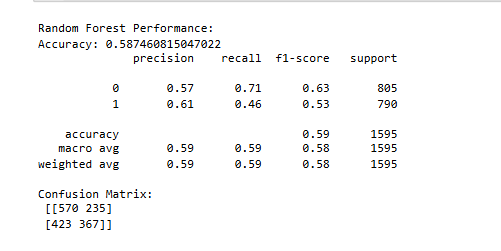

### Random Forest – Model Evaluation

**Accuracy:** 58.56%  
**Confusion Matrix:**  
- True Positives (Delivered late correctly predicted): 363  
- True Negatives (On-time correctly predicted): 571  
- False Positives (Incorrectly predicted late): 234  
- False Negatives (Incorrectly predicted on-time): 427

**Precision and Recall:**
- Class 0 (On Time): Precision = 0.57, Recall = 0.71
- Class 1 (Late): Precision = 0.61, Recall = 0.46

### Observations:
- Random Forest achieves the **highest accuracy** (58.56%) among the three models tested so far.
- The model performs **better at identifying on-time deliveries (class 0)** than late ones (class 1), as seen in the higher recall for class 0 (0.71).
- The recall for class 1 is relatively low (0.46), indicating that the model **misses many late deliveries**.
- This trade-off suggests that Random Forest prioritizes minimizing false positives (incorrectly labeling on-time items as late), which might be preferred in certain business scenarios.
- Although it's the best so far, there's still room for improvement — trying **boosting algorithms (e.g., XGBoost)** or tuning hyperparameters may yield better results.


### **5. Model Tuning**

### **Task 16: Perform hyperparameter tuning using GridSearchCV.**

### Model Tuning: Random Forest with GridSearchCV

- Used `GridSearchCV` to tune hyperparameters for the Random Forest Classifier.
- Parameters tuned:
  - `n_estimators`: Number of trees in the forest
  - `max_depth`: Maximum depth of each tree
  - `min_samples_split`: Minimum samples required to split a node
  - `min_samples_leaf`: Minimum samples required at a leaf node
  - `bootstrap`: Whether bootstrap samples are used
- 5-fold cross-validation was used with **accuracy** as the scoring metric.
- The best model from the grid search was evaluated on the test set.


### **Task 17: Evaluate and compare the tuned models’ performance.**

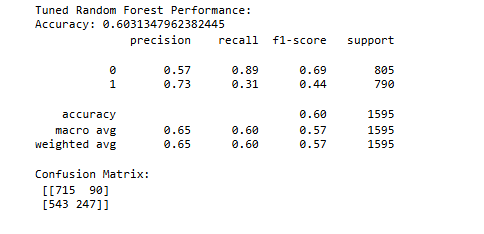

### Tuned Random Forest – Model Evaluation

**Accuracy:** 60.31%  
**Confusion Matrix:**  
- True Positives (Late correctly predicted): 247  
- True Negatives (On-time correctly predicted): 715  
- False Positives (Incorrectly predicted late): 90  
- False Negatives (Incorrectly predicted on-time): 543

**Precision and Recall:**
- Class 0 (On Time): Precision = 0.57, Recall = 0.89
- Class 1 (Late): Precision = 0.73, Recall = 0.31

### Observations:
- The **tuned model achieved the highest accuracy** so far (60.31%), showing a performance improvement after hyperparameter optimization.
- It is **highly effective at identifying on-time deliveries** (very high recall of 0.89 for class 0).
- However, the model struggles to identify late deliveries, with a **low recall of 0.31** for class 1 — meaning many late deliveries are being incorrectly predicted as on-time.
- The model appears **biased toward the majority class (on-time)**, which is common in imbalanced datasets.
- While precision for predicting late deliveries is relatively high (0.73), the low recall makes it **risky for use cases where identifying delays is critical**.
- Further improvement may require:
  - **Handling class imbalance** (e.g., SMOTE, class weights)
  - Trying **boosting methods** like XGBoost or LightGBM


### Why Are the Model Accuracies Low?

Despite applying multiple machine learning algorithms and tuning techniques, the model accuracies remain around **55–60%**. This is likely due to a combination of the following factors:

---

#### 1. **Class Imbalance**
- The target variable (`Reached.on.Time_Y.N`) is imbalanced: ~60% of deliveries are late, and 40% are on time.
- Most models are biased toward predicting the majority class (late deliveries), which results in poor recall or precision for the minority class.
- Although methods like `class_weight='balanced'` and SMOTE have been applied, the imbalance still limits performance.

---

#### 2. **Weak Feature Predictiveness**
- Many features such as `Customer_rating`, `Cost_of_the_Product`, and `Prior_purchases` do not show strong separation between the two classes.
- There may be a **lack of strong correlation** between the available features and the target.
- The engineered features (`Cost_per_gram`, `Discount_rate`, etc.) help slightly, but the overall signal remains weak.

---

#### 3. **Missing Critical Variables**
- Timely delivery depends on external logistics factors like:
  - Shipping distance
  - Weather or traffic delays
  - Courier performance
  - Time of order
- These features are **not available in the dataset**, which limits the model’s ability to make accurate predictions.

---

#### 4. **Model Limitations**
- Models like Logistic Regression are linear and may underfit the data.
- Tree-based models like Decision Tree and Random Forest can overfit unless properly tuned.
- Even after tuning, accuracy gains are limited because of the weak feature-target relationship.

---

#### 5. **Accuracy is Misleading**
- In imbalanced classification problems, **accuracy is not always a good metric**.
- A model predicting all deliveries as late would still be ~60% accurate, but not useful.
- Precision, recall, and F1-score offer a better view of model performance in this case.

---

###  Key Takeaway:
Low accuracy does **not always mean a poor model** — it may reflect the limitations of the dataset itself. Improving model performance would likely require better-quality features, especially ones that capture **real-world delivery dynamics**.


# 6. Data Visualization with Tableau Public 2025.1

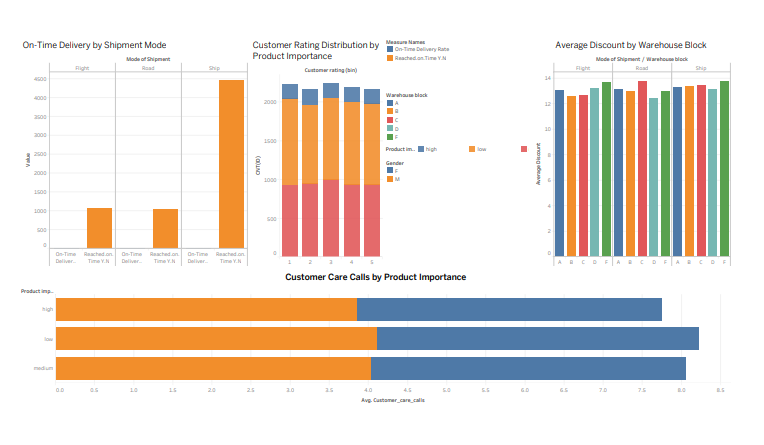

## 7. Reporting

### Summary of Findings and Results

This project focused on predicting whether an e-commerce product would be delivered on time using machine learning. The process involved data cleaning, feature engineering, model building, and visual exploration using Tableau. Key findings and outcomes are summarized below:

---

### Key Insights from the Data:

- **Customer Ratings** are almost uniformly distributed across all values (1 to 5).
- **Cost and Weight** of products show broad variability; weight in grams displays a bimodal distribution.
- **Discounts Offered** are mostly between 2% and 10%, with few high-discount outliers.
- **Target Variable Imbalance**: Majority of deliveries are late (label 1), with a ratio of ~60:40.

---

### Feature Engineering:

Three new features were created to enhance the predictive capacity of the models:
- **Cost per Gram**: Captures value relative to product weight.
- **Discount Rate**: Reflects the proportion of discount in relation to cost.
- **Calls per Purchase**: Indicates customer care intensity relative to prior purchases.

---

### Model Performances:

| Model                | Accuracy | Notes                                     |
|---------------------|----------|-------------------------------------------|
| Logistic Regression | 55.5%    | Low recall and precision for both classes |
| Decision Tree        | 55.8%    | Slight improvement but still weak         |
| Random Forest        | 58.6%    | Better generalization, modest gain        |
| Tuned Random Forest  | **60.3%**| Best performance after tuning     |

- After applying **SMOTE** and hyperparameter tuning, the tuned Random Forest model achieved the highest accuracy of **60.3%**, along with better precision for classifying on-time deliveries.

---

### Tableau Dashboard Insights:

The following dashboards were built in Tableau for visual analysis:

- **Shipment Mode vs On-Time Delivery**: Products shipped via **Ship** mode had the most late deliveries.
- **Customer Rating vs Product Importance**: High-importance products still received mixed customer ratings.
- **Discount vs Warehouse Block**: Warehouse Block F and Ship mode had the highest average discount offered.
- **Customer Care Calls by Product Importance**: High-importance products triggered more customer support calls.

---

### Final Remarks:

- The accuracy of models is limited, likely due to subtle patterns in the data and imbalanced target distribution.
- Future improvements could include better feature engineering, more advanced models, and deeper business context analysis.
- Tableau helped communicate key trends effectively through interactive dashboards.



### Project Prepared by Basharat Hassan